## Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import (StandardScaler, PowerTransformer)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix

### Data Overview

In [2]:
df = pd.read_csv('dataset.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
df = df.rename(columns={'chest pain type':'chest_pain_type',
                        'resting bp s':'resting_bp_s',
                        'fasting blood sugar':'fasting_blood_sugar',
                        'resting ecg':'resting_ecg',
                        'max heart rate':'max_heart_rate',
                        'exercise angina':'exercise_angina',
                        'ST slope':'ST_slope'})

In [4]:
df

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### Data Analysis

In [5]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


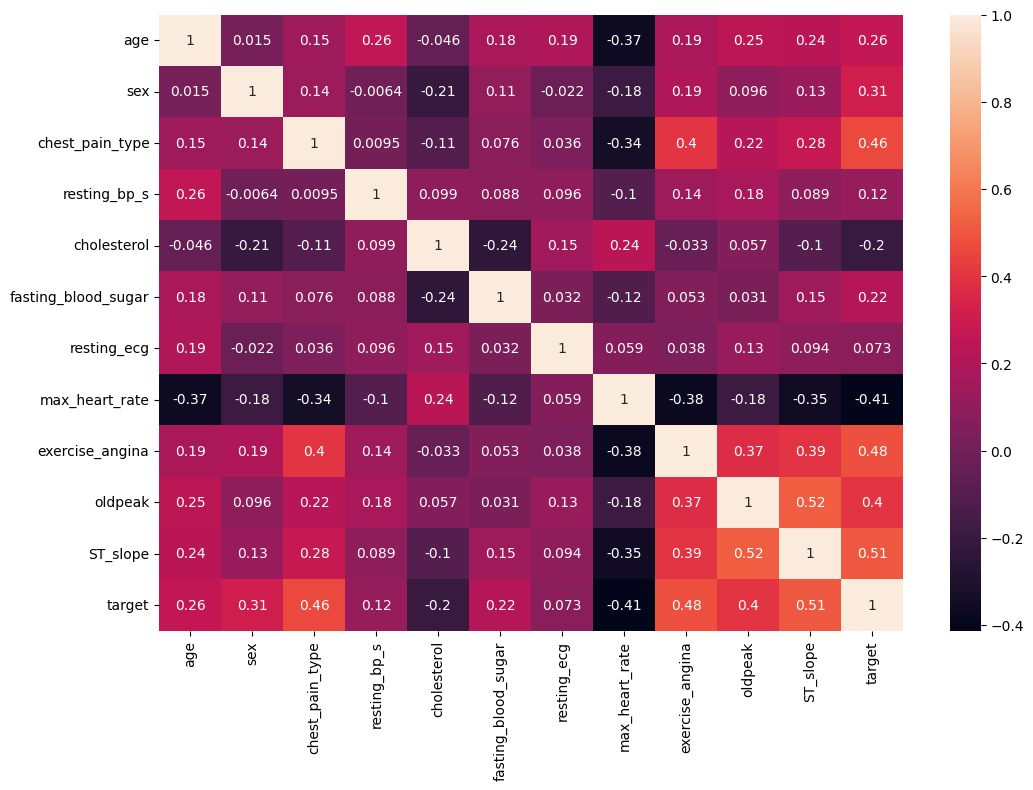

In [6]:
# correlation heatmap 
plt.figure(figsize=(12, 8))   # width=12, height=8
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

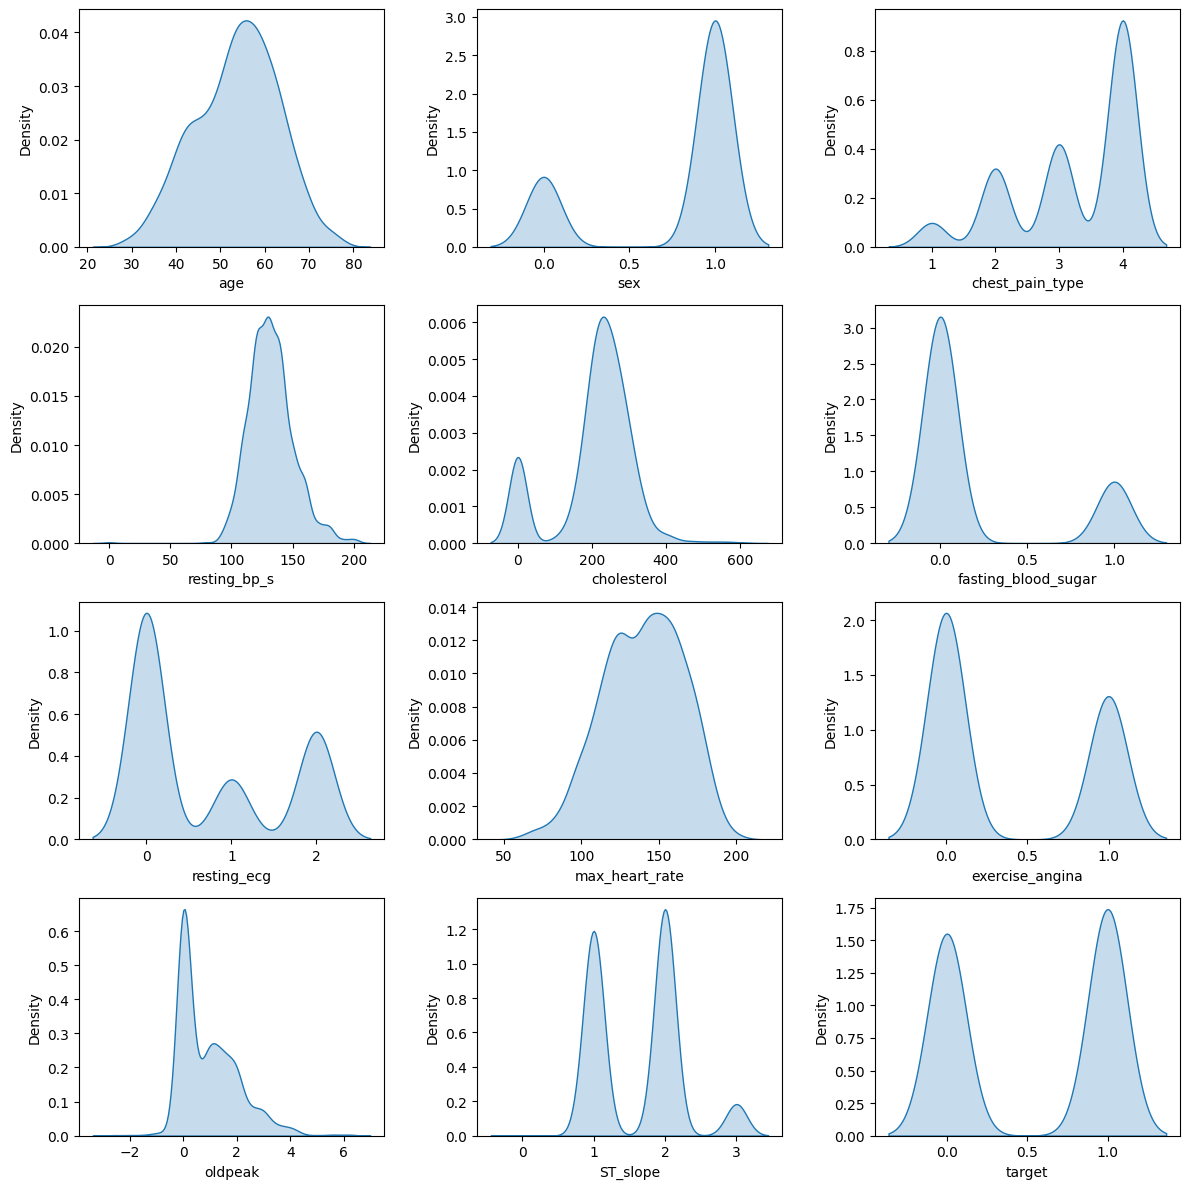

In [7]:
# skewness check of individual features

# Number of features
features = df.columns
n_features = len(features)

# Create subplots (2 columns layout)
fig, axes = plt.subplots((n_features + 1)//3, 3, figsize=(12, 3*n_features//3))
axes = axes.flatten()  # Flatten 2D axes array into 1D for easy indexing

# Loop through features
for i, col in enumerate(features):
    sns.kdeplot(df[col], fill=True, ax=axes[i])
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data preprocessing

In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
# test-train splitiing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(952, 11)
(238, 11)
(952,)
(238,)


In [10]:
#check for missing values
X_train.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
dtype: int64

In [11]:
# check for duplicate rows
len(df) - len(df.duplicated(subset=None, keep='first'))

0

In [12]:
# Define our pipeline of transformations to apply and in what order
pipe = Pipeline([('transfomer', PowerTransformer(method='yeo-johnson')),
                ('scaler', StandardScaler())])

In [13]:
numeric_pipe = pipe.fit(X_train)
numeric_pipe.transform(X_train)

array([[ 0.97818124,  0.56764621,  0.89112908, ...,  1.28522783,
         0.92265769, -1.04563065],
       [-2.1022217 ,  0.56764621, -0.515958  , ..., -0.77807216,
        -0.86414795, -1.04563065],
       [ 0.20706122, -1.76166066,  0.89112908, ...,  1.28522783,
         0.99246949,  0.7139664 ],
       ...,
       [ 0.75498406,  0.56764621, -1.79088429, ..., -0.77807216,
         1.43710366,  0.7139664 ],
       [ 0.86630129, -1.76166066,  0.89112908, ..., -0.77807216,
         1.97262746,  1.86103121],
       [-1.24370578,  0.56764621, -1.36173649, ..., -0.77807216,
        -0.86414795, -1.04563065]], shape=(952, 11))

### Cross-vaidation setup

In [16]:
# Stratified KFold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Hyperparameter Tuning

In [17]:
# Base LightGBM model
lgb_clf = lgb.LGBMClassifier(random_state=42)

In [18]:
# Hyperparameter grid
param_dist = {
    "num_leaves": [31, 50, 70, 100],
    "max_depth": [-1, 10, 20, 30],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [200, 500, 1000],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}

In [19]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=30,   # number of parameter settings sampled
    scoring=make_scorer(accuracy_score),
    cv=skf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [20]:
# Fit
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

### Final Model training and evaluation

In [21]:
pipeline = Pipeline([
    ("var_thresh", VarianceThreshold(threshold=0.01)),         # low variance filter
    ("select_best", SelectKBest(score_func=f_classif, k=35)),  # univariate selection
    ("clf", lgb.LGBMClassifier(**random_search.best_params_, random_state=42))
])

# Fit best model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\muska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=35 is greater than n_features=11. All the features will be returned.
  warnings.warn(


[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

C:\Users\muska\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
